In [1]:
# Data

CO2_ppm_reciprocal_ground = [0.0023, 0.0021, 0.0023, 0.00097, 0.00033, 0.00035, 0.00022, 0.00037, 0.00075]
delta13_C_per_thousand_ground = [-7.5, -8.3, -7.7, -3.7, -2.1, -2.2, -2, -1.5, -2.4 ]

CO2_ppm_reciprocal_drone = [0.0015]
delta13_C_per_thousand_drone = [-4.4]

CO2_ppm_reciprocal_ambient = [0.0024]
delta13_C_per_thousand_ambient = [-8]

La_Palma_cold_CO2_Gas = [-4.7, -2.8]
pyroxenes = [-2.5,-1.4]
El_Hierro_olivines = [-0.325, 1]
Cumbre_Vieja_Erupting_Gas = [-1.3, 0.3]



In [2]:
# Plotting
from matplotlib import pyplot as plt
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
})

import numpy

In [3]:
len(CO2_ppm_reciprocal_ground) == len(delta13_C_per_thousand_ground)

True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Pyroxines: [-2.5] [-1.4]
Cumbre_Vieja_Erupting_Gas: [-1.3] [0.3]


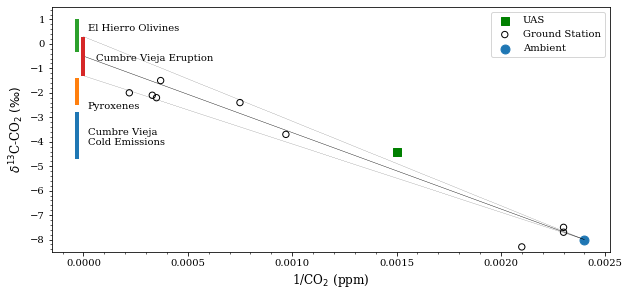

In [20]:
size = 80

fig, ax = plt.subplots(figsize=(10, 4.5))

#Line Plot from Ambient to Eruption
ax.plot([0, CO2_ppm_reciprocal_ambient[0]], [Cumbre_Vieja_Erupting_Gas[0], delta13_C_per_thousand_ambient[0]], "k--", linewidth=0.2)
ax.plot([0, CO2_ppm_reciprocal_ambient[0]], [Cumbre_Vieja_Erupting_Gas[1], delta13_C_per_thousand_ambient[0]], "k--", linewidth=0.2)
ax.plot([0, CO2_ppm_reciprocal_ambient[0]], [numpy.mean(Cumbre_Vieja_Erupting_Gas), delta13_C_per_thousand_ambient[0]], "k-", linewidth=0.4)

#Plot drone measurements
ax.scatter(CO2_ppm_reciprocal_drone, delta13_C_per_thousand_drone, s=size, marker='s', color='green', label='UAS')

#Plot ground measurements
ax.scatter(CO2_ppm_reciprocal_ground, delta13_C_per_thousand_ground, s=size/2, marker='o', edgecolors='black', facecolors='none', label='Ground Station')

#Plot ambient
ax.scatter(CO2_ppm_reciprocal_ambient, delta13_C_per_thousand_ambient, s=size, label='Ambient')

#Plot La Palma Cold Emmisions Range
ax.errorbar(-0.00003, numpy.mean(La_Palma_cold_CO2_Gas), yerr = numpy.diff(La_Palma_cold_CO2_Gas)/2, fmt ='', linewidth=4)
ax.text(0.00002, numpy.mean(La_Palma_cold_CO2_Gas)-0.4, 'Cumbre Vieja\nCold Emissions')

#Plot Pyroxenes Range
ax.errorbar(-0.00003, numpy.mean(pyroxenes), yerr = numpy.diff(pyroxenes)/2, fmt ='', linewidth=4)
ax.text(0.00002, numpy.mean(pyroxenes)-0.7, 'Pyroxenes')

#Plot El Hierro Olivines
ax.errorbar(-0.00003, numpy.mean(El_Hierro_olivines), yerr = numpy.diff(El_Hierro_olivines)/2, fmt ='', linewidth=4)
ax.text(0.00002, numpy.mean(El_Hierro_olivines)+0.2, 'El Hierro Olivines')

#Plot La Palma Eruption Emmisions Range
ax.errorbar(0.0, numpy.mean(Cumbre_Vieja_Erupting_Gas), yerr = numpy.diff(Cumbre_Vieja_Erupting_Gas)/2, fmt ='', linewidth=4)
ax.text(0.00006, numpy.mean(Cumbre_Vieja_Erupting_Gas)-0.2, 'Cumbre Vieja Eruption')

ax.set_xlabel(r'1/CO$_2$ (ppm)', size=12)
ax.set_ylabel(r'$\delta^{13}$C-CO$_2 \; (\perthousand)$', size=12) 
ax.set_ylim(-8.5,1.5)
ax.set_yticks(range(-8,2))
ax.minorticks_on()
ax.legend() 

print("Pyroxines:", numpy.mean(pyroxenes)-numpy.diff(pyroxenes)/2, numpy.mean(pyroxenes)+numpy.diff(pyroxenes)/2)
print("Cumbre_Vieja_Erupting_Gas:", numpy.mean(Cumbre_Vieja_Erupting_Gas)-numpy.diff(Cumbre_Vieja_Erupting_Gas)/2, numpy.mean(Cumbre_Vieja_Erupting_Gas)+numpy.diff(Cumbre_Vieja_Erupting_Gas)/2)
plt.savefig('KeelingPlot.eps', format='eps')